In [56]:
def number1516(number):
    return (number % number - 1) + (number) + 2*(number % 2)

In [57]:
number1516(16)

15

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

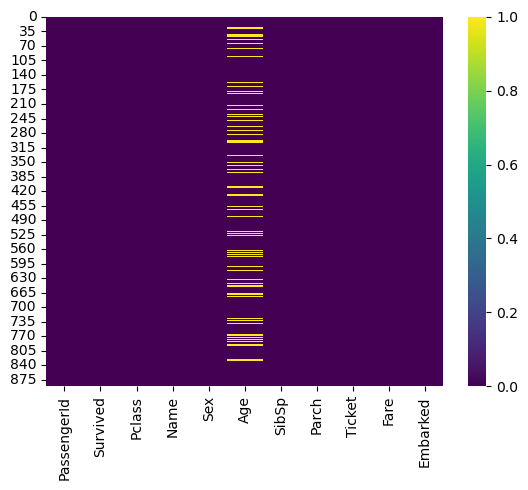

In [4]:
titanic.drop('Cabin',inplace=True,axis=1)
sns.heatmap(data=titanic.isnull(),cmap='viridis')

In [5]:
#filling in the missing age data.
#split male and female ages's avg

In [6]:
# first convert the sex to 0 or 1 format. i.e; categorical features to numerical

In [7]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [8]:
import cufflinks as cf
cf.go_offline()

C:\Users\nokap\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [9]:
# sns.histplot(sex)
# sex.iplot(kind='hist',bins=2)
# 314 females
# 577 males = n

# avg_males_age = titanic[titanic['Sex'] == 'male'].dropna()['Age'].sum() / 577
# avg_females_age = titanic[titanic['Sex'] == 'female'].dropna()['Age'].sum() / 314

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Pclass', ylabel='Age'>

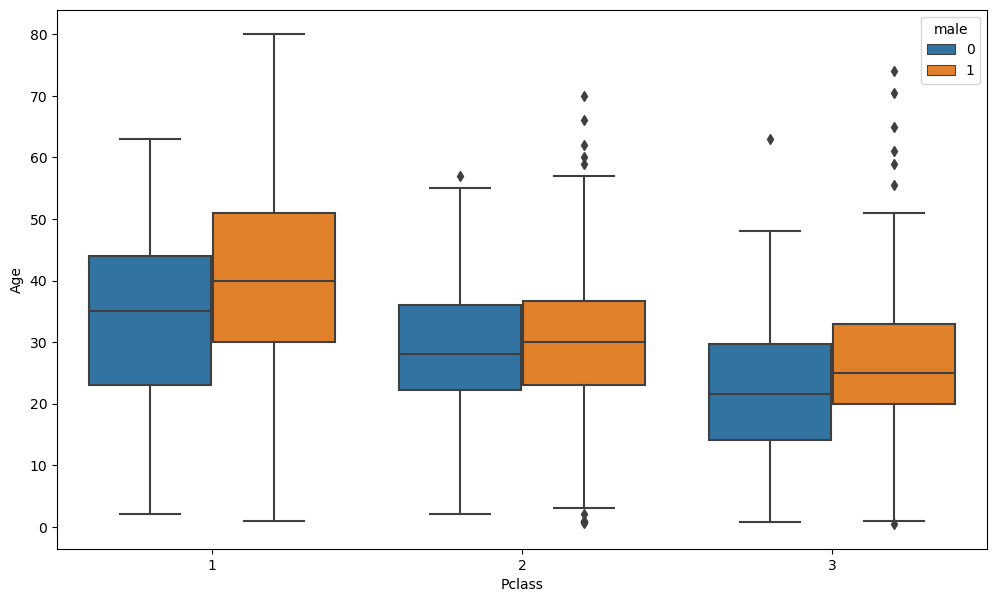

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Age',x='Pclass',data=titanic,hue=sex['male'])

In [12]:
def imputeAge(cols):
    pClass = cols[0]
    age = cols[1]
    sex = cols[2]
    if pd.isnull(age):
        if pClass == 1:
            if sex == 1: # male
                return 39
            else:
                return 36
        elif pClass == 2:
            if sex == 1:
                return 31
            else:
                return 28
        else:
            if sex == 1:
                return 23
            else:
                return 21
    else:
        return age

In [13]:
titanic['sex'] = sex['male']

In [14]:
titanic.rename(columns={'sex':'male'},inplace=True)

In [15]:
titanic.drop(['Sex'],axis=1,inplace=True)

In [16]:
titanic['Age'] = titanic[['Pclass','Age','male']].apply(imputeAge,axis=1)

<Axes: >

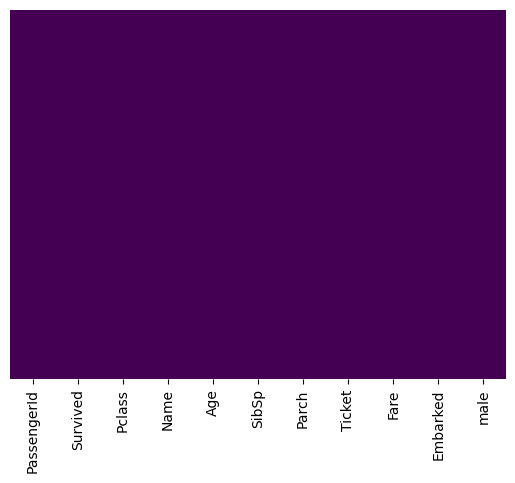

In [17]:
sns.heatmap(data=titanic.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [18]:
titanic.dropna(inplace=True)

In [19]:
embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [20]:
titanic.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [21]:
titanic = titanic.join(embarked)

In [22]:
df = titanic
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
#lets train on this and check 

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()

In [26]:
# from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [28]:
# Scaling required

In [29]:
from sklearn import preprocessing

In [30]:
scaler = preprocessing.StandardScaler().fit(X.drop('PassengerId',axis=1))

In [31]:
scaler

StandardScaler()

In [32]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,21.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [33]:
X_scaled = scaler.transform(X.drop('PassengerId',axis=1))

In [34]:
scaler = preprocessing.StandardScaler().fit(X_scaled)

In [35]:
scaler

StandardScaler()

In [36]:
x_scaled_test = scaler.transform(X_scaled)

In [37]:
logmodel.fit(x_scaled_test,y)

LogisticRegression()

In [38]:
#testing and running actual testing data

In [39]:
titanic_test = pd.read_csv('titanic_test.csv')

<Axes: >

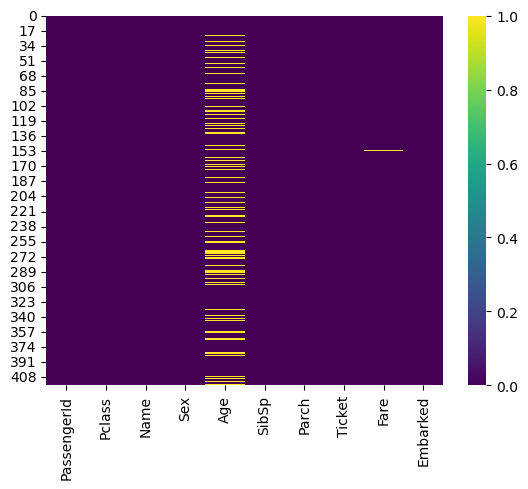

In [40]:
titanic_test.drop(['Cabin'],axis=1,inplace=True)
sns.heatmap(titanic_test.isnull(),cmap='viridis')

In [41]:
# sns.boxplot(y='Age',x='Pclass',hue='')
sex = pd.get_dummies(data=titanic_test['Sex'],drop_first=True)
titanic_test=titanic_test.join(sex)

In [42]:
titanic_test.drop(['Sex'],inplace=True,axis=1)

<Axes: xlabel='Pclass', ylabel='Age'>

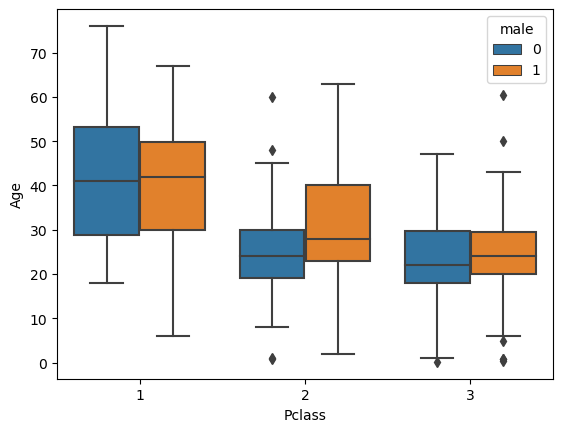

In [43]:
sns.boxplot(data=titanic_test,x='Pclass',y='Age',hue='male')

In [44]:
def fillAge(cols):
    age = cols[0]
    pClass = cols[1]
    sex = cols[2]
    if pd.isnull(age):
        if sex == 1: # male
            if pClass == 1:
                return 41
            elif pClass == 2:
                return 23
            elif pClass == 3:
                return 21
        else:
            if pClass == 1:
                return 43
            elif pClass == 2:
                return 28
            elif pClass == 3:
                return 24
    else:
        return age

In [45]:
titanic_test['Age'] = titanic_test[['Age','Pclass','male']].apply(fillAge,axis=1)

In [47]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(0)
titanic_test[titanic_test['Fare'].isna()]

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male


In [48]:
# titanic_test.dropna(inplace=True)

<Axes: >

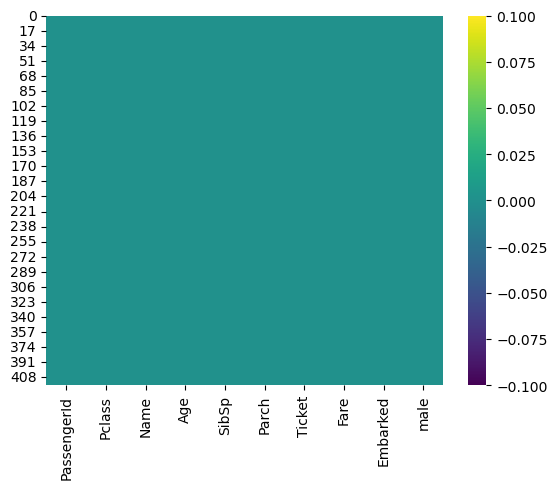

In [49]:
sns.heatmap(titanic_test.isnull(),cmap='viridis')

In [50]:
titanic_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,0


In [51]:
embark = pd.get_dummies(titanic_test['Embarked'],drop_first=True)

In [52]:
titanic_test = titanic_test.join(embark)

In [53]:
titanic_test.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [54]:
X_test = titanic_test.drop('PassengerId',axis=1)
scaler = preprocessing.StandardScaler().fit(X_test)

In [55]:
print(titanic_test.drop('PassengerId',axis=1).columns)
print(X_test.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')


In [56]:
scaler

StandardScaler()

In [57]:
# transform the testing data

In [58]:
X_test_transformed = scaler.transform(X_test)
scaler.fit(X_test_transformed)

StandardScaler()

In [59]:
predictions = logmodel.predict(X_test_transformed)

In [60]:
pred = pd.DataFrame(predictions)
pred[pred[0]==1].count()
pred[pred[0]==0].count()

0    272
dtype: int64

In [61]:
# df2 = titanic_test

In [62]:
# df2.join(pred)
# df2[0].

pred_df = pd.DataFrame(index=titanic_test['PassengerId'])

In [63]:
titanic_test.shape

(418, 9)

In [64]:
# pred_df.columns = ['Survived','PassengerId','No']

In [65]:
# pred_df['PassengerId'] = titanic_test['PassengerId']

In [66]:
# swapping columns
# colnames = pred_df.columns.tolist()
# index1, index2 = colnames.index(pred_df.columns[0]), colnames.index(pred_df.columns[1])
# colnames[index2], colnames[index1] = colnames[index1], colnames[index2]
# pred_df = pred_df[colnames]

In [67]:
pred_df['Survived'] = predictions

In [68]:
pred_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [69]:
pred_df.to_csv('Titanic_Test_Result.csv')

In [ ]:
# trying RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [71]:
rfc.fit(x_scaled_test,y)

RandomForestClassifier()

In [72]:
rfc_pred = rfc.predict(X_test_transformed)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
r_pred_df = pd.DataFrame()

In [80]:
r_pred_df['PassengerId'] = titanic_test['PassengerId']

In [82]:
r_pred_df['Survived'] = rfc_pred

In [85]:
r_pred_df.to_csv('Titanic_Rest_RFC.csv',index=False)